In [9]:
import os
import numpy as np
import pandas as pd
import sqlalchemy as sa
from IPython.display import display, HTML
from common import dat

In [10]:
import gi
gi.require_version('Gtk', '3.0')
from graph_tool.all import *

In [24]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load graph that we created in part 1

In [4]:
g = load_graph('elaspic_network.gt')

In [5]:
g_wmodel = GraphView(g, vfilt=g.vp['have_model'], efilt=g.ep['have_model'])

In [ ]:
#graph_draw(g_wmodel, inline=True)

In [ ]:
g, pos = 

In [6]:
from numpy.random import seed, random

In [20]:
g, pos = triangulation(random((200,2)), type="delaunay")

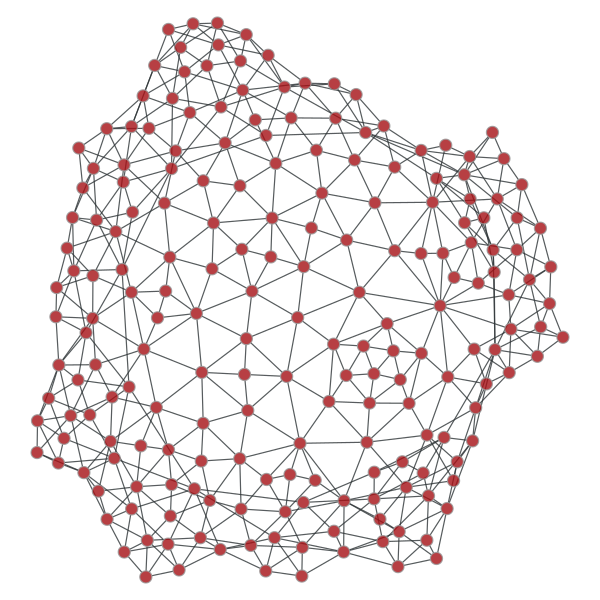

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7ffe53897048, at 0x7ffe53882f28>

In [21]:
graph_draw(g, inline=True)

In [26]:
graphviz_draw(g, output='graphviz.pdf')

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7ffe53897048, at 0x7ffe538974a8>

In [ ]:
deg = g.degree_property_map("total")


In [41]:
pos = sfdp_layout(g)

In [36]:
pos = random_layout(g)

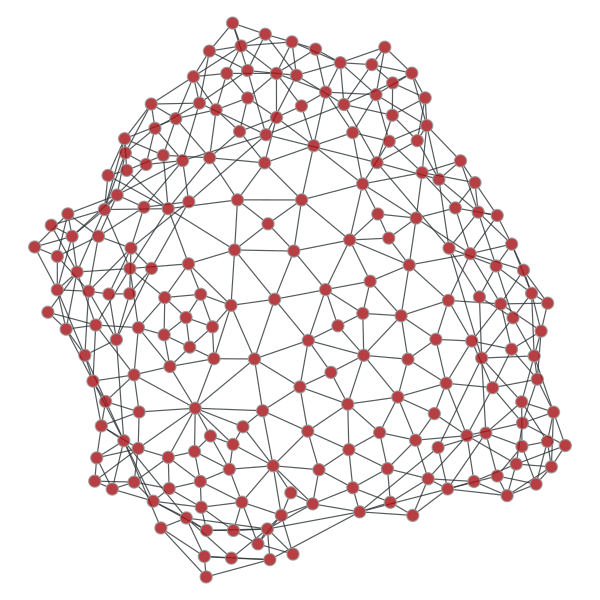

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7ffe53897048, at 0x7ffe538a0400>

In [39]:
graph_draw(g, pos=pos, inline=True)

In [33]:
graphviz_draw(g, pos=pos, output='

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7ffe53897048, at 0x7ffe538a0630>

In [42]:
g_wmodel = load_graph('elaspic_network_wmodel.gt')

In [43]:
graph_draw(g_wmodel, pos=g_wmodel.vp['pos'], output='elaspic_network_wmodel_gt.pdf')

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7ffe538a0f98, at 0x7ffe34021278>

In [53]:
v = g_wmodel.vertex(0)

In [57]:
list(v.all_neighbours())

[<Vertex object with index '7398' at 0x7ffe53955318>,
 <Vertex object with index '8159' at 0x7ffe539551b0>]

In [ ]:
int(v)

In [ ]:
graph_draw(g, inline=True)

In [ ]:
g_all.vp['uniprot_id'] = g_all


In [ ]:
g = Graph(directed=False)
g.add_edge_list(uniprot_pairs_wmodel[['uniprot_key_1', 'uniprot_key_2']].values)

In [ ]:
uniprot_pairs_wmodel.shape

In [ ]:
# Exclude splice variants
elaspic_interactome_human_novarsplice = (
    elaspic_interactome_all[
        elaspic_interactome_all['organism_name'] == 'Homo sapiens'
    ]
)

In [ ]:
elaspic_df['uniprot_pair'] = (
    elaspic_df[['ud1_uniprot_id', 'ud2_uniprot_id']].apply(
        lambda x: '_'.join(sorted(x)), axis=1)
)

In [ ]:
elaspic_df['is_splicevar'] = (
    elaspic_df['uniprot_pair'].str.contains('-')
)

In [ ]:
uniprots_all = (
    set(elaspic_df['ud1_uniprot_id']) |
    set(elaspic_df['ud2_uniprot_id'])
)

uniprots_canon = {u for u in uniprots_all if '-' not in u}

uniprot2key_all = {u: i for (i, u) in enumerate(uniprots_all)}
key2uniprot_all = {u: i for (i, u) in uniprot2key_all.items()}

uniprot2key_canon = {u: i for (i, u) in enumerate(uniprots_canon)}
key2uniprot_canon = {u: i for (i, u) in uniprot2key_canon.items()}

In [ ]:
dat.print2("All uniprots:", len(uniprots_all))
dat.print2("Canonical uniprots:", len(uniprots_canonical))

In [ ]:
# All uniprots
g_all = Graph(directed=False)
v_all = g_all.add_vertex(len(uniprots_all))

In [ ]:
# Canonical uniprots
g_canon = Graph(directed=False)
v_canon = g_canonical.add_vertex(len(uniprots_canonical))

In [ ]:
for uniprot_pair, is_canonical in (
        elaspic_df.drop_duplicates('uniprot_pair')
        [['uniprot_pair', 'is_canonical']]
        .values:
    ):
    print(uniprot_pair, is_canonical);
    break
    a, b = uniprot_pair.split('_')
    a_idx, b_idx = uniprot2key_all[a], uniprot2key_all[b]
    a_vertex, b_vertex = g_all.vertex(a_idx), g_all.vertex(b_idx)
    g_all.add_edge(a_vertex, b_vertex)
    if '-' not in a and '-' not in b:
        a_idx, b_idx = uniprot2key_canon[a], uniprot2key_canon[b]
        a_vertex, b_vertex = g_canon.vertex(a_idx), g_all.vertex(b_idx)
        g_canonical.add_edge(a_vertex, b_vertex)

In [ ]:
# Save the constructed graphs
g_all.save("g_all.xml.gz")
g_canon.save("g_canon.xml.gz")

In [ ]:
g_all.vp['uniprot_id'] = g_all.new_vertex_property("string")
for v in g_all.vertices():
    g_all.vp['uniprot_id'][v] = key2uniprot_all[v]
    
g_canon.vp['uniprot_id'] = g_canonical.new_vertex_property("string")
for v in g_all.vertices():
    g_all.vp['uniprot_id'][v] = key2uniprot_all[v]

In [ ]:
v = g_canon.vertex(0)

In [ ]:
list(v.out_neighbours())

In [ ]:
g_all.vp['uniprot_id'][g_all.vertex(0)]

In [ ]:
pos = sfdp_layout(g_canon)

In [ ]:
graph_draw(g_canon, pos=pos, inline=True)